In [1]:
import pandas as pd
import mysql.connector

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sb

In [4]:
import numpy as np

In [5]:
conn = mysql.connector.connect(
    host = 'localhost',
    port = 3306,
    user = 'root',
    password = 'root',
    database = 'test'
)

In [6]:
dataframe = pd.read_sql_query('select * from Student',conn)

In [7]:
dataframe

,name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [8]:
dataframe.head()

,name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53


In [9]:
dataframe.shape

(10, 11)

In [10]:
dataframe.dtypes

name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

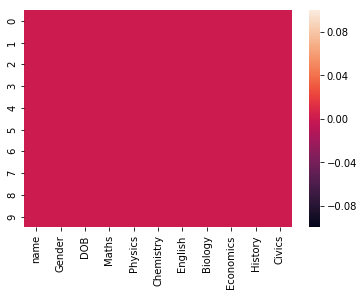

In [11]:
sb.heatmap(dataframe.isnull())

In [12]:
dataframe.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


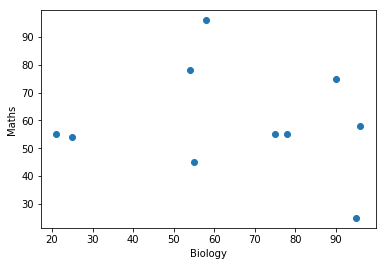

In [13]:
x=dataframe['Biology']
y=dataframe['Maths']
plt.xlabel('Biology')
plt.ylabel('Maths')
plt.scatter(x,y)

In [14]:
dataframe.corr(method='pearson')

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


(array([2., 1., 0., 2., 0., 0., 1., 0., 1., 3.]),
 array([45. , 50.1, 55.2, 60.3, 65.4, 70.5, 75.6, 80.7, 85.8, 90.9, 96. ]),
 <a list of 10 Patch objects>)

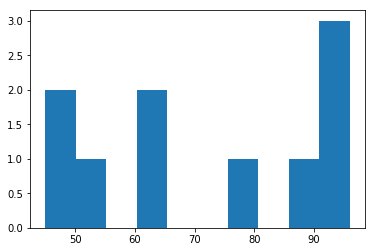

In [15]:
plt.hist(dataframe['Physics'])

/home/direwolf/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


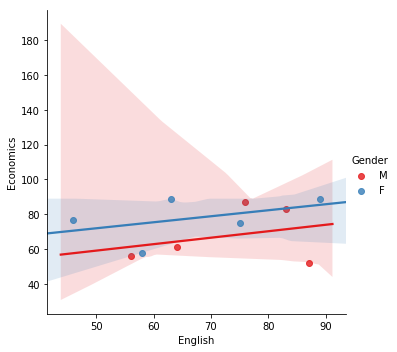

In [16]:
sb.lmplot(x='English',y='Economics',data=dataframe,hue='Gender',legend=True,palette='Set1')

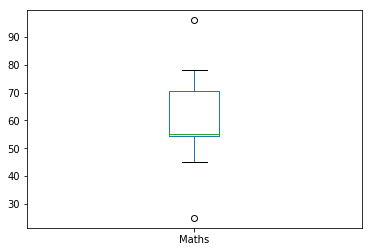

In [17]:
dataframe['Maths'].plot.box()

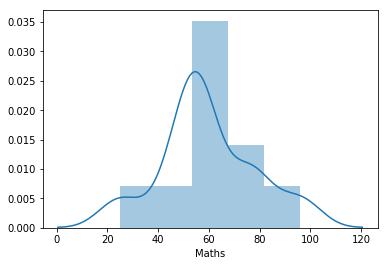

In [18]:
sb.distplot(dataframe['Maths'])

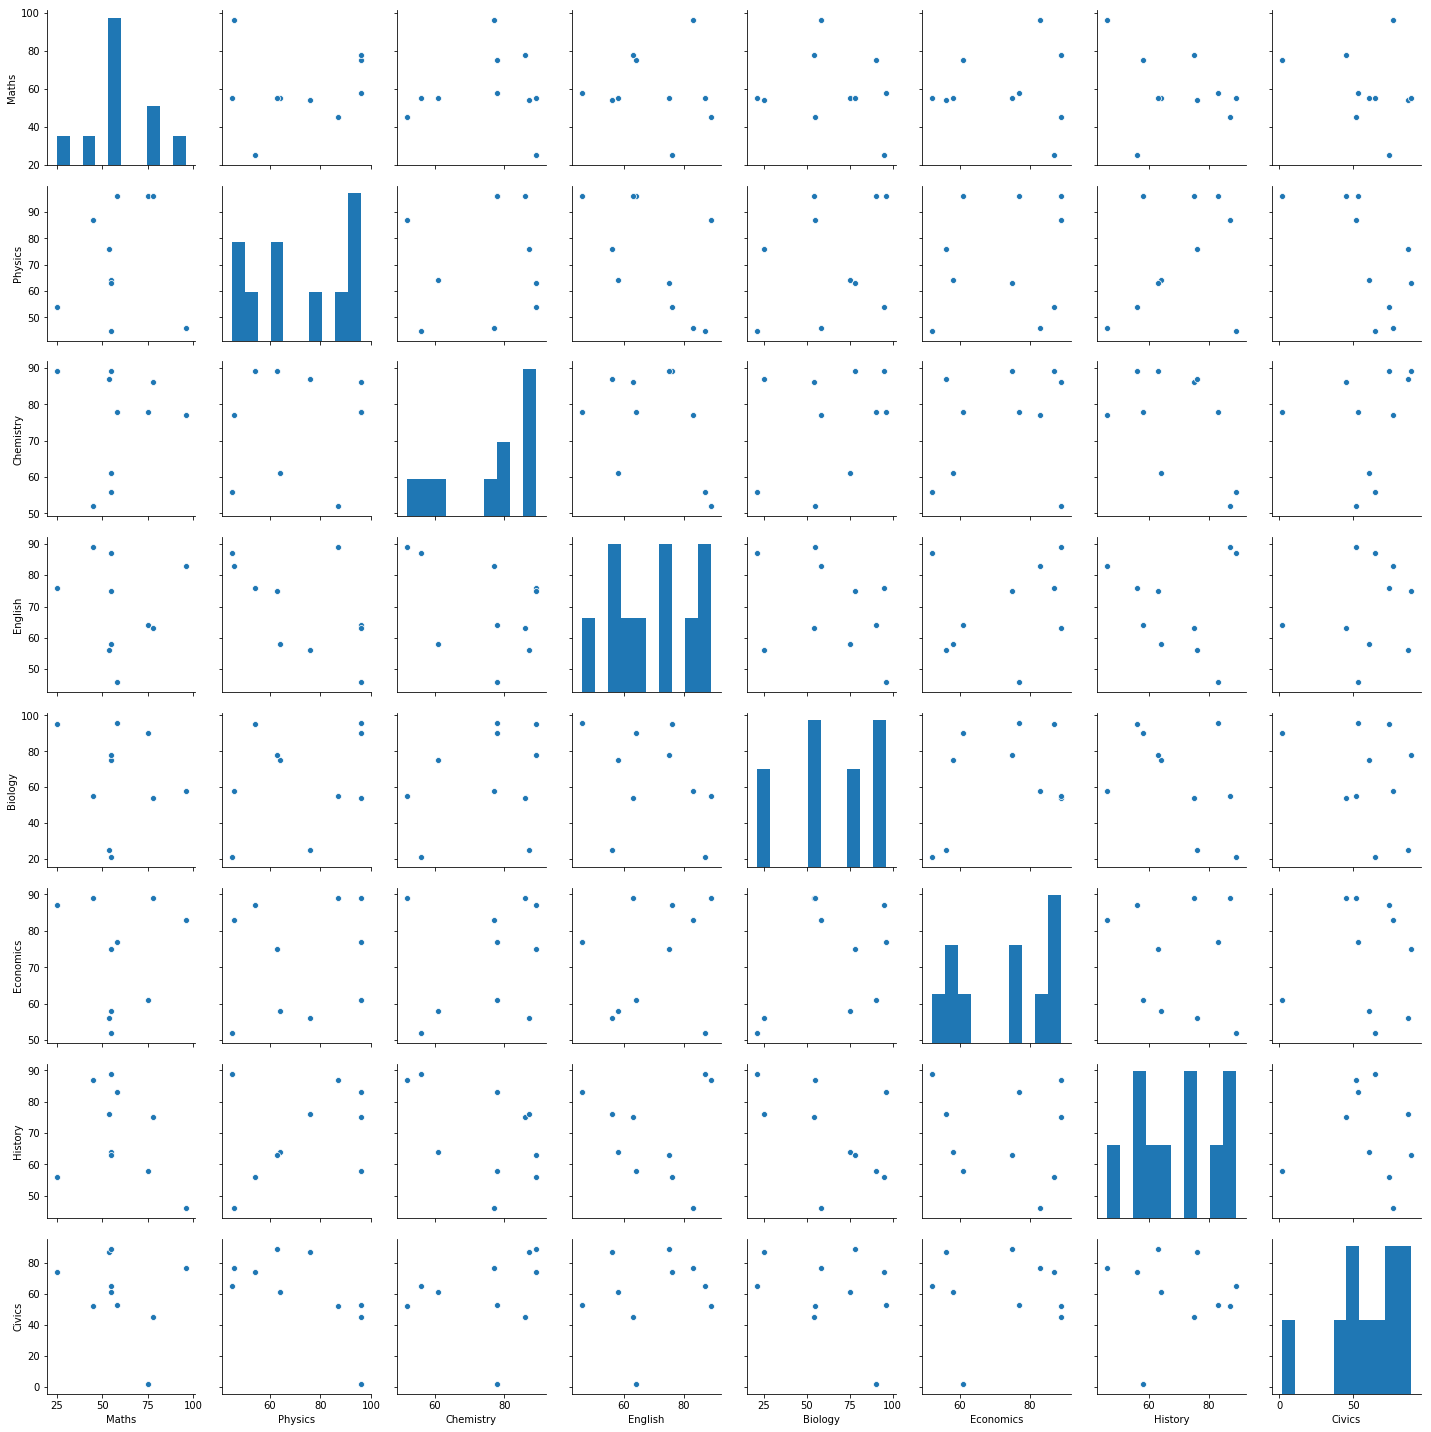

In [19]:
sb.pairplot(data=dataframe)

In [ ]:
/home/direwolf/Project-1.ipynb